<a href="https://colab.research.google.com/github/jothiovia-2004/project/blob/main/Location_based_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✔ Interactive map saved as restaurants_map.html

Restaurants per city:
 City
New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Trentham East          1
Weirton                1
Vineland Station       1
Winchester Bay         1
Yorkton                1
Name: Locality, Length: 141, dtype: int64


/tmp/ipython-input-123390392.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts.head(10).index, y=city_counts.head(10).values, palette="viridis")


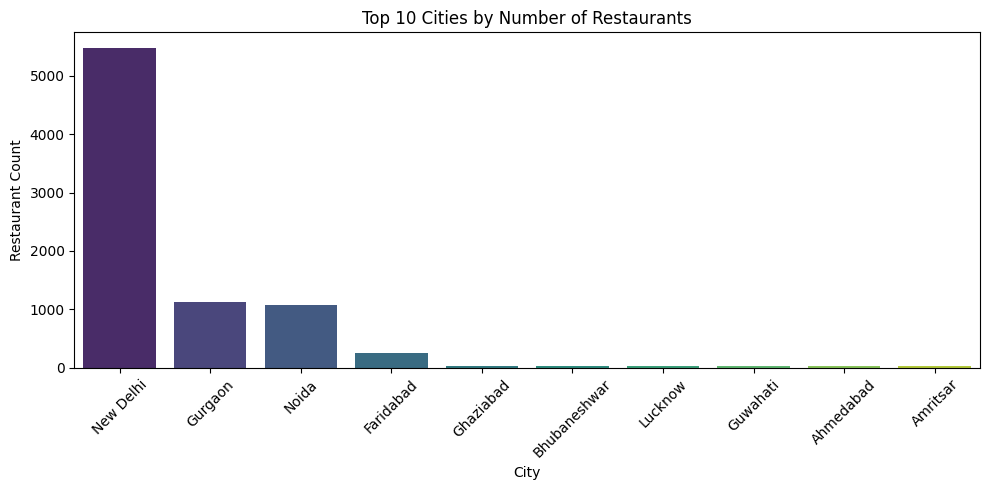


Average rating & price range by city:
                   Avg Rating  Avg Price Range
City                                         
Inner City          4.900000             4.00
Quezon City         4.800000             3.00
Makati City         4.650000             3.00
Pasig City          4.633333             3.00
Mandaluyong City    4.625000             3.75
Beechworth          4.600000             2.00
London              4.535000             3.00
Taguig City         4.525000             3.50
Secunderabad        4.500000             2.00
Lincoln             4.500000             2.00

Top 3 cuisines by city:
 City                           
Abu Dhabi       Indian              7
                American            4
                Chinese             3
Agra            North Indian       15
                Mughlai             9
                                   ..
Winchester Bay  Steak               1
Yorkton         Asian               1
��stanbul       Desserts            4
        

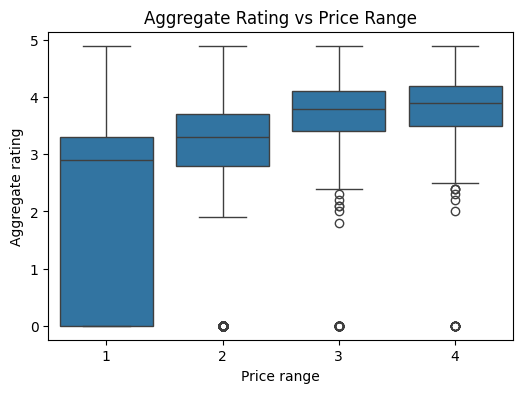

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

df = pd.read_csv("Dataset .csv")

# Keep only needed columns
cols = ['City','Locality','Latitude','Longitude','Aggregate rating',
        'Cuisines','Price range']
data = df[cols].dropna(subset=['Latitude','Longitude'])


# Choose a center point – here we use the mean of all coords
center_lat = data['Latitude'].mean()
center_lon = data['Longitude'].mean()

m = folium.Map(location=[center_lat, center_lon], zoom_start=12)

for _, row in data.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=2,
        color='blue',
        fill=True,
        fill_opacity=0.6,
        popup=f"{row['Locality']} ({row['Aggregate rating']})"
    ).add_to(m)

# Save to html to view in a browser
m.save("restaurants_map.html")
print("✔ Interactive map saved as restaurants_map.html")

city_counts = data.groupby('City')['Locality'].count().sort_values(ascending=False)
print("\nRestaurants per city:\n", city_counts)

# Top 10 cities plot
plt.figure(figsize=(10,5))
sns.barplot(x=city_counts.head(10).index, y=city_counts.head(10).values, palette="viridis")
plt.title("Top 10 Cities by Number of Restaurants")
plt.ylabel("Restaurant Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

stats = data.groupby('City').agg({
    'Aggregate rating':'mean',
    'Price range':'mean'
}).rename(columns={'Aggregate rating':'Avg Rating','Price range':'Avg Price Range'}).sort_values(by='Avg Rating',ascending=False)

print("\nAverage rating & price range by city:\n", stats.head(10))

# Example: Top cuisines by city
top_cuisines = (data.groupby('City')['Cuisines']
                .apply(lambda x: x.str.split(',').explode().str.strip().value_counts().head(3)))
print("\nTop 3 cuisines by city:\n", top_cuisines)

# Correlation between price range and rating
plt.figure(figsize=(6,4))
sns.boxplot(x='Price range', y='Aggregate rating', data=data)
plt.title("Aggregate Rating vs Price Range")
plt.show()
